In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

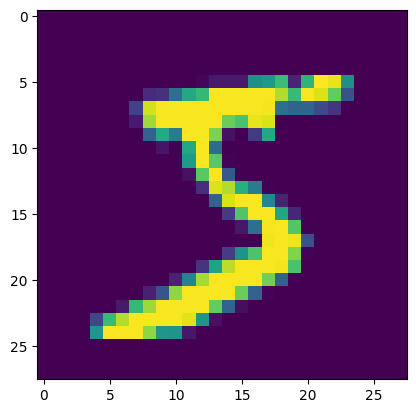

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

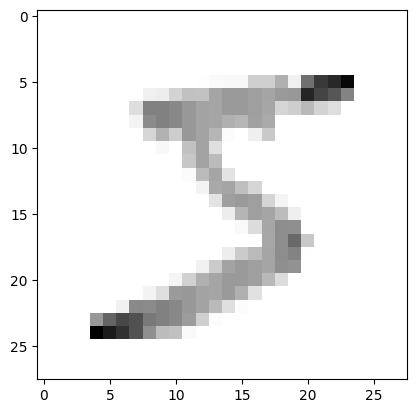

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


In [ ]:
import numpy as np
i=28
x_trainr=np.array(x_train).reshape(-1,i,i,1)
x_testr=np.array(x_test).reshape(-1,i,i,1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
print("Total Training Samples=",len(x_trainr))

Total Training Samples= 60000


In [ ]:
from keras.api._v2.keras import metrics
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
hist=model.fit(x_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.2108 - accuracy: 0.9325 - val_loss: 0.0837 - val_accuracy: 0.9761
Epoch 2/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0699 - accuracy: 0.9784 - val_loss: 0.0658 - val_accuracy: 0.9811
Epoch 3/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0537 - val_accuracy: 0.9847
Epoch 4/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 0.0522 - val_accuracy: 0.9851
Epoch 5/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0434 - val_accuracy: 0.9870
Epoch 6/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0488 - val_accuracy: 0.9868
Epoch 7/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0459 -

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
hist.history

{'loss': [0.2040022611618042,
  0.06807967275381088,
  0.045635808259248734,
  0.035090018063783646,
  0.025562863796949387,
  0.020323066040873528,
  0.015279584564268589,
  0.011975186876952648,
  0.011491470038890839,
  0.009880978614091873],
 'accuracy': [0.937333345413208,
  0.9792708158493042,
  0.9854999780654907,
  0.9890833497047424,
  0.9916666746139526,
  0.9931250214576721,
  0.9947083592414856,
  0.9961875081062317,
  0.9963333606719971,
  0.996708333492279],
 'val_loss': [0.07929390668869019,
  0.06491690874099731,
  0.04898214712738991,
  0.048594165593385696,
  0.0513707734644413,
  0.04413079470396042,
  0.04354456439614296,
  0.047026362270116806,
  0.04857426509261131,
  0.05059909075498581],
 'val_accuracy': [0.9755833148956299,
  0.9816666841506958,
  0.984749972820282,
  0.9865833520889282,
  0.984666645526886,
  0.9868333339691162,
  0.987416684627533,
  0.987583339214325,
  0.9871666431427002,
  0.9879166483879089]}

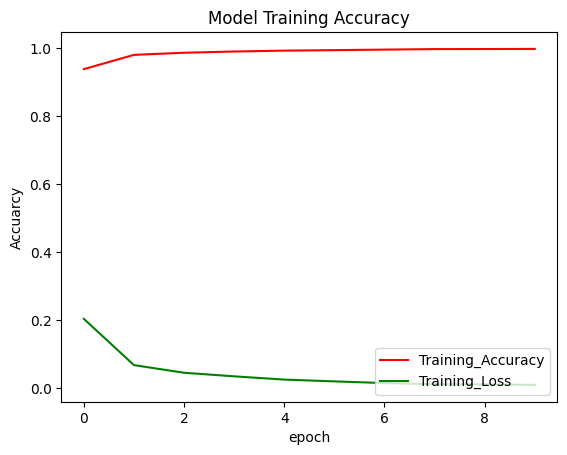

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],'-r',label='Training_Accuracy')
plt.plot(hist.history['loss'],'-g',label='Training_Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()